# Project RN 


<div class="alert alert-block alert-danger">  
<h2><center><strong>Importation des librairies necessaires üìï üìó üìò üìô</strong></center></h2>
        
</div>

commencant par l'importation des librairies qu'on aura besoin dans notre projet

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import ruptures as rpt
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from sklearn.naive_bayes import MultinomialNB
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from nltk.tokenize import RegexpTokenizer
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Model
from keras.optimizers import RMSprop
#from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.feature_extraction.text import CountVectorizer
from time import time 

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import make_pipeline
import os
from tensorflow.keras.preprocessing import sequence
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dropout, Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import Callback
from tensorflow.keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taouc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\taouc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# initialiser les outils NLTK
porter = PorterStemmer()
lancaster = LancasterStemmer()
stop_words = set(stopwords.words('english'))

Importation des donnees

In [2]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding="ISO-8859-1", engine="python")
data.columns = ["label", "id", "date", "query", "username", "text"]

<div class="alert alert-block alert-danger">  
<h2><center><strong>Exploration des donnees üîé üìä</strong></center></h2>
        
</div>

* Les 5 premieres lignes des donnees

In [3]:
data.head()

label          id                          date     query       username  \
0      0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1      0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2      0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3      0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4      0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  
0  is upset http://twitpic.com/2y1zl that he can'...  
1  @Kenichan :'-) I dived many times for the ball...  
2   :( my whole body feels itchy and like its on ...  
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew

En lisant le contenu des tweets, on peut conclure qu'ils portent un contenu negatif, donc la classe 0 refere aux tweets avec sentiments negatifs

Les 5 dernieres lignes des donnees

In [4]:
data.tail()

label          id                          date     query  \
1599994      4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995      4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996      4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997      4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998      4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                username                                               text  
1599994  AmandaMarie1028  Just woke up. Having no school is the best fee...  
1599995      TheWDBoards  TheWDB.com - Very cool to hear old Walt interv...  
1599996           bpbabe  Are you ready for your MoJo Makeover? Ask me f...  
1599997     tinydiamondz  Happy 38th Birthday to my boo of alll time!!! ...  
1599998   RyanTrevMorris  happy #charitytuesday @theNSPCC @SparksCharity...

En lisant le contenu des tweets, on peut conclure qu'ils portent un contenu positif, donc la classe 4 refere aux tweets avec sentiments positifs

In [5]:
#Colomnes des donnees 
data.columns

Index(['label', 'id', 'date', 'query', 'username', 'text'], dtype='object')

In [6]:
# La taille des donnees
print('La taille des donnees est', len(data))

La taille des donnees est 1599999


In [7]:
# Shape of data
data.shape

(1599999, 6)

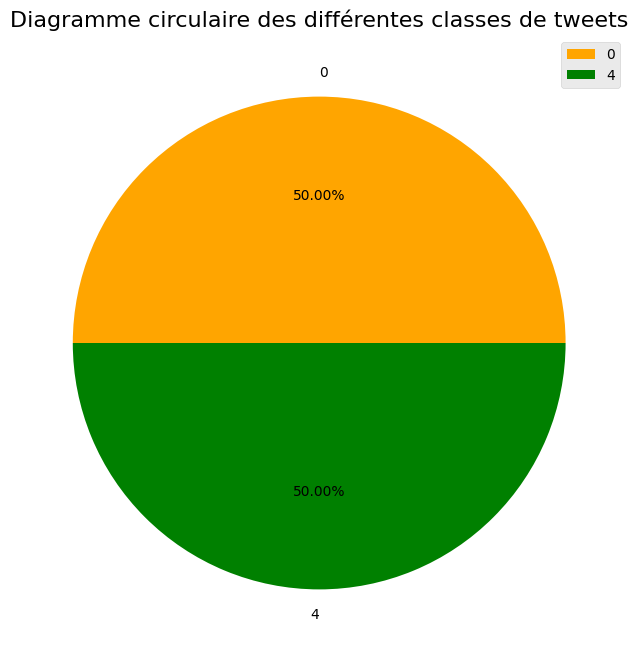

In [8]:
fig = plt.figure(figsize=(8,8))
labels = data.groupby('label').size()
labels.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['orange','green'])
plt.title("Diagramme circulaire des diff√©rentes classes de tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()

le dataset est divise en 2 parties egales 50 % des tweets negatifs et 50% autres des tweets positifs

Text(0, 0.5, 'Count')

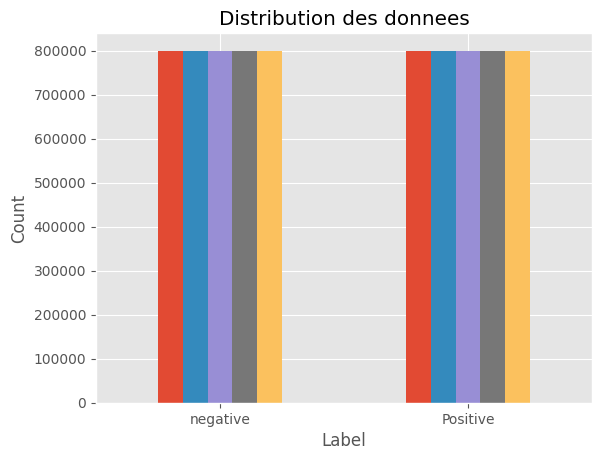

In [9]:
#Tracage de la distribution de dataset.
ax = data.groupby('label').count().plot(kind='bar', title='Distribution des donnees',
                                        legend=False)
ax.set_xticklabels(['negative', 'Positive'], rotation=0)
ax.set_xlabel('Label')
ax.set_ylabel('Count')

In [10]:
#Des infos sur les donnees 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   id        1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [11]:
#types des donnees
data.dtypes

label        int64
id           int64
date        object
query       object
username    object
text        object
dtype: object

### Analyse exploratoire des donn√©es :

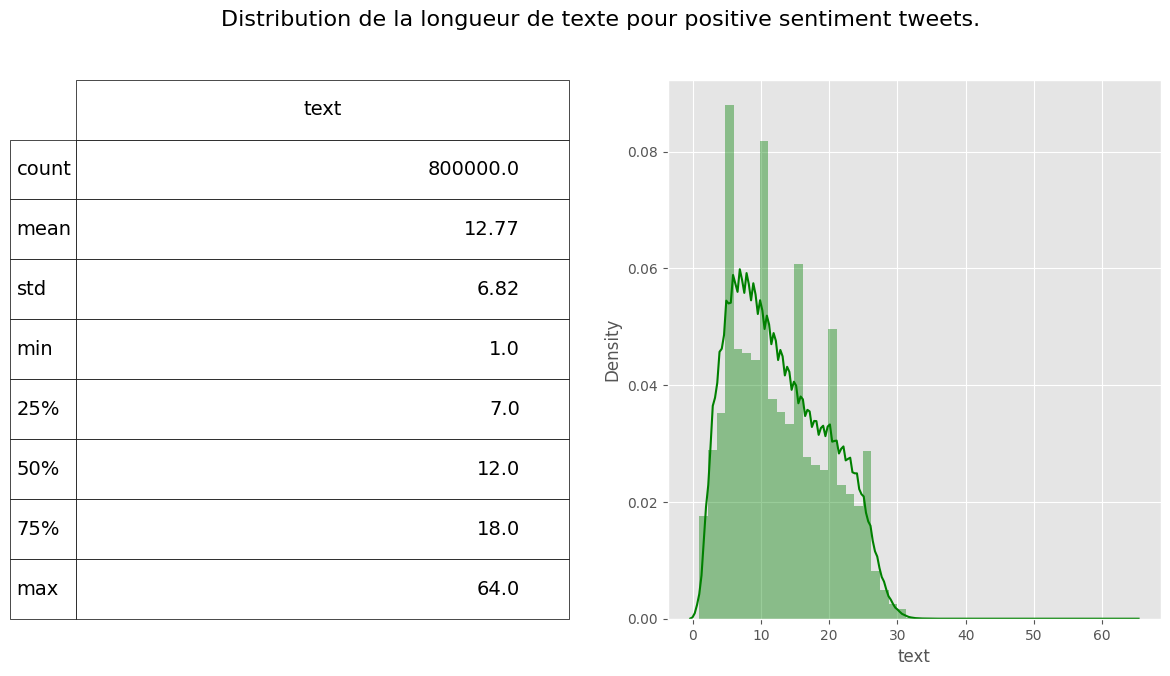

In [12]:
lengths = data.text.str.split().apply(len)

fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(lengths[data['label']==4], ax=ax1, color='green')
describe = lengths[data.label==4].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution de la longueur de texte pour positive sentiment tweets.', fontsize=16)

plt.show()

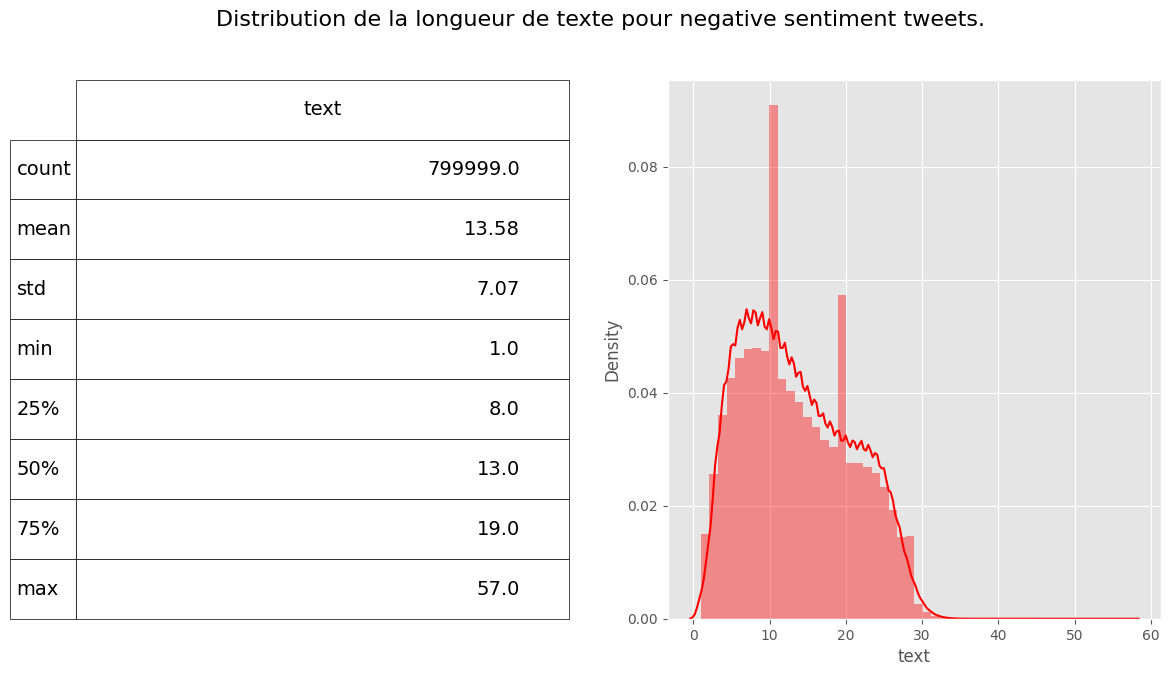

In [13]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(lengths[data['label']==0], ax=ax1, color='red')
#sns.distplot(data[data['label']== 0]['length'], ax=ax1,color='red')
describe = lengths[data.label==0].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution de la longueur de texte pour negative sentiment tweets.', fontsize=16)

plt.show()

In [14]:
#cette ligne de code compte le nombre de lignes dans  
#data qui contiennent au moins une valeur nulle (NaN)
np.sum(data.isnull().any(axis=1))

0

In [15]:
#Nbr de lignes et de colonnes du dataset :
print("Le nombre de colonnes dans notre Dataset est :", len(data.columns))
print("Le nombre de lignes dans le dataset est :", len(data))

Le nombre de colonnes dans notre Dataset est : 6
Le nombre de lignes dans le dataset est : 1599999


<div class="alert alert-block alert-danger">  
<h2><center><strong>Preparation des donnees üìù</strong></center></h2>
        
</div>


* Selection des colonnes qui nous interesse 
* attribuer la valeur 1 aux sentiments positifs
* Separation des tweets negatifs et positifs puis prendre une partie de data pour chaque categorie puis les combiner 

In [16]:
#selectionner uniquement les colonnes 'text' et 'label' de Data
data= data[['text','label']]

In [17]:
#c'est dans le but de simplifier l'analyse et l'entra√Ænement de nos mod√®les
data['label'][data['label']==4]=1

In [18]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

In [19]:
data_pos = data_pos.iloc[:int(800000)]
data_neg = data_neg.iloc[:int(800000)]

#Maintenant on combine les deux categories des tweets
data = pd.concat([data_pos, data_neg])
print(len(data))
data.head(2)

1599999


text  label
799999       I LOVE @Health4UandPets u guys r the best!!       1
800000  im meeting up with one of my besties tonight! ...      1

###  * Nettoyage des tweets :
1. Minuscule
2. Remplacement des abreviations pour une meilleure comprehension (meme chose pour les abreviations , doivent etre remplaces apres la ponctu car y a des cas y a pas d'espace avec la pontuatiion )
3. Remplacement des emojis par leurs signification
4. suppression des emails/mentions(avant la ponctuation)
5. suppression des URLs
6. suppression des balises HTML (doit se faire avant ponctuation aussi)
7. Suppression de la ponctuation et des non-mots ( la ponctuation se fait avant les stopwords parce que y a des cas ou y a pas d'espace entre les stopwords et la ponctuation)
8. Suppression des mots vides 
9. Suppression de lettres cons√©cutives : 3 lettres cons√©cutives ou plus sont remplac√©es par 2 lettres. (par exemple : "goooood" devient "good")
10. suppression des chiffres
11. Tokenisation du texte des tweets
12. Radicalisation des mots
13. Lemmatisation : reduire les mots flechis ou declines a leur forme canonique ou a leur base lexicale (lemme) 



In [20]:
data['text'].head()

799999         I LOVE @Health4UandPets u guys r the best!! 
800000    im meeting up with one of my besties tonight! ...
800001    @DaRealSunisaKim Thanks for the Twitter add, S...
800002    Being sick can be really cheap when it hurts t...
800003      @LovesBrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [21]:
data['text'].tail()

799994    Sick  Spending my day laying in bed listening ...
799995                                      Gmail is down? 
799996                        rest in peace Farrah! So sad 
799997    @Eric_Urbane Sounds like a rival is flagging y...
799998    has to resit exams over summer...  wishes he w...
Name: text, dtype: object

In [22]:
data['text'] = data['text'].str.lower()
data['text'].tail()

799994    sick  spending my day laying in bed listening ...
799995                                      gmail is down? 
799996                        rest in peace farrah! so sad 
799997    @eric_urbane sounds like a rival is flagging y...
799998    has to resit exams over summer...  wishes he w...
Name: text, dtype: object

In [23]:
def cleaning_Abreviations(text):
    abr_remplacement = {
        'u' : 'you',
        'r' : 'are',
        'some1': 'somoene',
        'yrs' : 'yours',
        'hrs' : 'hours',
        'mins' : 'minutes',
        'secs': 'seconds',
        'pls': 'please',
        'plz' : 'please',
        '2morow': 'tomorrow',
        '2moro' : 'tomorrow',
        '2day': 'today',
        '4got': 'forget',
        '4gotten':'forget',
        'amp':'',
        'quot':'',
        'lt':'',
        'gt':'',
        '¬Ω25':'',
        'b4':'before',
        'thx':'thanks',
        'thnks':'thanks',
        'w/':'with',
        'w/o':'without',
        'gf':'girlfriend',
        'bf':'boyfriend',
        '2nite':'tonight',
        '2nyt':'tonight',
        'bc':'because',
        'b/c':'because',
        'bff':'bestfriend',
        'btw':'by the way',
        'ty' :'thank you',
        'cuz': 'because',
        'ilu': 'i love you',
        'coz': 'because',
        'ily' :'i love you',
        'gn': 'good night',
        'gm' : 'good morning',
        'fr': 'for real',
        'hme':'hit me up',
        'idk' : 'i don\'t know',
        'fwiw' : 'for what it\'s worth',
        'gonna': 'going to',
        'imo' :'in my opinion',
        'imho' :'in my humble opinion',
        'jk': 'just kidding',
        'lol':'laugh out loud',
        'wyd': 'what are you doing',
        'hru': 'how are you',
        'hbu': 'how about you',
        'wbu':'what about you',
        'ur' : 'your',
        'hv' :'have',
        'tmi':'too much information',
        'ttyl':'talk to you later',
        'sry' :'sorry',
        'tho':'though',
        'u\'re':'you are',
        'diy': 'do it yourself',
        'rofl': 'rolling on the floor laughing',
        'br':'best regards',
        'w8':'wait',
        'i\'m':'am',
        'im': 'am'
   }
    
    words = text.split()

    #appliquer les remplacements d'abreviations
    cleaned_words = []
    for word in words :
        if word in abr_remplacement:
            cleaned_word = abr_remplacement[word]
        else:
            cleaned_word = word
        cleaned_words.append(cleaned_word)

    return ' '.join(cleaned_words)

In [24]:
def cleaning_Emojis(text):
    emojis = {':)': 'smile',
                ':-)': 'smile',
                ';d': 'wink',
                ':-E': 'vampire',
                ':(': 'sad', 
                ':-(': 'sad',
                ':-<': 'sad',
                '<3': 'heart',
                ':P': 'raspberry', 
                ':O': 'surprised',
                ':-@': 'shocked', 
                ':@': 'shocked',
                ':-$': 'confused', 
                ':\\': 'annoyed', 
                ':#': 'mute', 
                ':X': 'mute', 
                ':^)': 'smile', 
                ':-&': 'confused', 
                '$_$': 'greedy',
                '@@': 'eyeroll', 
                ':O' : 'shoked',
                ':-!': 'confused', 
                ':-D': 'laughing',
                'XD':'laughing', 
                ':-0': 'yell', 
                'O.o': 'confused',
                '<(-_-)>': 'robot',
                'd[-_-]b': 'dj',
                ":'-)": 'sadsmile',
                ';)': 'wink', 
                ';-)': 'wink',
                'X-(':'disappointed',
                'O:-)': 'angel',
                'O*-)': 'angel',
                '(:-D': 'gossip',
                '=^.^=': 'cat'
                }
    
    words = text.split()

    # Appliquer les remplacements d'emojis
    cleaned_words = []
    for word in words:
        if word in emojis:
            cleaned_word = emojis[word]
        else:
            cleaned_word = word
        cleaned_words.append(cleaned_word)

    return ' '.join(cleaned_words)


In [25]:
data['text'].tail()

799994    sick  spending my day laying in bed listening ...
799995                                      gmail is down? 
799996                        rest in peace farrah! so sad 
799997    @eric_urbane sounds like a rival is flagging y...
799998    has to resit exams over summer...  wishes he w...
Name: text, dtype: object

In [26]:
data['text'] = data['text'].apply(lambda x: cleaning_Emojis(x))
data['text'].tail()

799994    sick spending my day laying in bed listening t...
799995                                       gmail is down?
799996                         rest in peace farrah! so sad
799997    @eric_urbane sounds like a rival is flagging y...
799998    has to resit exams over summer... wishes he wo...
Name: text, dtype: object

In [27]:
#Enlever les emails et URL
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ',data)

def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(http?://[^\s]+))', ' ',data)

In [28]:
data['text'].tail()

799994    sick spending my day laying in bed listening t...
799995                                       gmail is down?
799996                         rest in peace farrah! so sad
799997    @eric_urbane sounds like a rival is flagging y...
799998    has to resit exams over summer... wishes he wo...
Name: text, dtype: object

In [29]:
data['text'] = data['text'].apply(lambda x: cleaning_email(x))
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))

data['text'].tail()

799994    sick spending my day laying in bed listening to  
799995                                       gmail is down?
799996                         rest in peace farrah! so sad
799997      sounds like a rival is flagging your ads. no...
799998    has to resit exams over summer... wishes he wo...
Name: text, dtype: object

In [30]:
def cleaning_balisesHTML(text):
    return re.sub(r'<.*?>', '',text) 

In [31]:
data['text'] = data['text'].apply(lambda x: cleaning_balisesHTML(x))

In [32]:
ponctuation_list = string.punctuation
def cleaning_ponctuations_espaces(text):
    #str.maketrans() cr√©e une table de traduction qui indique √† translate() quelles lettres doivent √™tre supprim√©es
    #translator = str.maketrans('','', ponctuation_list)
    translator = str.maketrans(ponctuation_list, ' ' * len(ponctuation_list))
    text_no_ponctuation = text.translate(translator)
    text_cleaned = re.sub(r'\s+',' ', text_no_ponctuation)
    return text_cleaned

* \s: Correspond √† tout caract√®re d'espace blanc, y compris les espaces, les tabulations et les retours √† la ligne.
* +: Signifie une ou plusieurs occurrences du motif pr√©c√©dent, c'est-√†-dire un ou plusieurs espaces blancs cons√©cutifs.

In [33]:
data['text'] = data['text'].apply(lambda x:cleaning_ponctuations_espaces(x))
data['text'].tail()
#print(ponctuation_list)

799994     sick spending my day laying in bed listening to 
799995                                       gmail is down 
799996                          rest in peace farrah so sad
799997     sounds like a rival is flagging your ads not ...
799998    has to resit exams over summer wishes he worke...
Name: text, dtype: object

In [34]:
data['text'] = data['text'].apply(lambda text: cleaning_Abreviations(text))
data['text'].head()

799999                         i love you guys are the best
800000    am meeting up with one of my besties tonight c...
800001    thanks for the twitter add sunisa i got to mee...
800002    being sick can be really cheap when it hurts t...
800003                       he has that effect on everyone
Name: text, dtype: object

In [35]:
stopwords_list = stopwords.words('english')
#print(stopwords_list)

In [36]:
", ".join(stopwords.words('english')) 

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [37]:
MOTSVIDES = set(stopwords.words('english'))
def cleaning_MotsVides(text):
    return " ".join([word for word in str(text).split() if word not in MOTSVIDES])


data['text'] = data['text'].apply(lambda text: cleaning_MotsVides(text))
#data['text'].head()
#print(data.tail())
data['text'].head()

799999                                       love guys best
800000      meeting one besties tonight cant wait girl talk
800001    thanks twitter add sunisa got meet hin show dc...
800002    sick really cheap hurts much eat real food plu...
800003                                      effect everyone
Name: text, dtype: object

In [38]:
def cleaning_char_repetes(text):
    return re.sub(r'(.)\1{1,}',r'\1\1',text)

In [39]:
data['text'] = data['text'].apply(lambda x:cleaning_char_repetes(x))
data['text'].tail()

799994               sick spending day laying bed listening
799995                                                gmail
799996                                rest peace farrah sad
799997           sounds like rival flagging ads much though
799998    resit exams summer wishes worked harder first ...
Name: text, dtype: object

In [40]:
def cleaning_nombres(data):
    return re.sub('[0-9]+', '',data)

In [41]:
data['text'] = data['text'].apply(lambda x: cleaning_nombres(x))
data['text'].tail()

799994               sick spending day laying bed listening
799995                                                gmail
799996                                rest peace farrah sad
799997           sounds like rival flagging ads much though
799998    resit exams summer wishes worked harder first ...
Name: text, dtype: object

In [42]:
tokenizer = RegexpTokenizer(r'\w+')
data['text']= data['text'].apply(tokenizer.tokenize)

In [43]:
data['text'].tail()

799994        [sick, spending, day, laying, bed, listening]
799995                                              [gmail]
799996                           [rest, peace, farrah, sad]
799997    [sounds, like, rival, flagging, ads, much, tho...
799998    [resit, exams, summer, wishes, worked, harder,...
Name: text, dtype: object

In [44]:
start_time = time()
st = nltk.PorterStemmer()
def Radicalisation_sur_text(data):
    text = [st.stem(word) for word in data]
    return text

data['text']= data['text'].apply(lambda x: Radicalisation_sur_text(x))
print('Le temps du CPU pour la radicalisation:', time() - start_time)

Le temps du CPU pour la radicalisation: 556.7714140415192


In [45]:
data['text'].tail()

799994                 [sick, spend, day, lay, bed, listen]
799995                                              [gmail]
799996                            [rest, peac, farrah, sad]
799997         [sound, like, rival, flag, ad, much, though]
799998    [resit, exam, summer, wish, work, harder, firs...
Name: text, dtype: object

In [46]:
start_time = time()
lm = nltk.WordNetLemmatizer()
def lemmatisation_sur_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text

data['text'] = data['text'].apply(lambda x: lemmatisation_sur_text(x))
print('Le temps du CPU pour la lemmatisation :', time() - start_time)

Le temps du CPU pour la lemmatisation : 101.29867386817932


In [47]:
data['text'].tail()

799994                 [sick, spend, day, lay, bed, listen]
799995                                              [gmail]
799996                            [rest, peac, farrah, sad]
799997         [sound, like, rival, flag, ad, much, though]
799998    [resit, exam, summer, wish, work, harder, firs...
Name: text, dtype: object

### Visualisation des donnees

Positive words


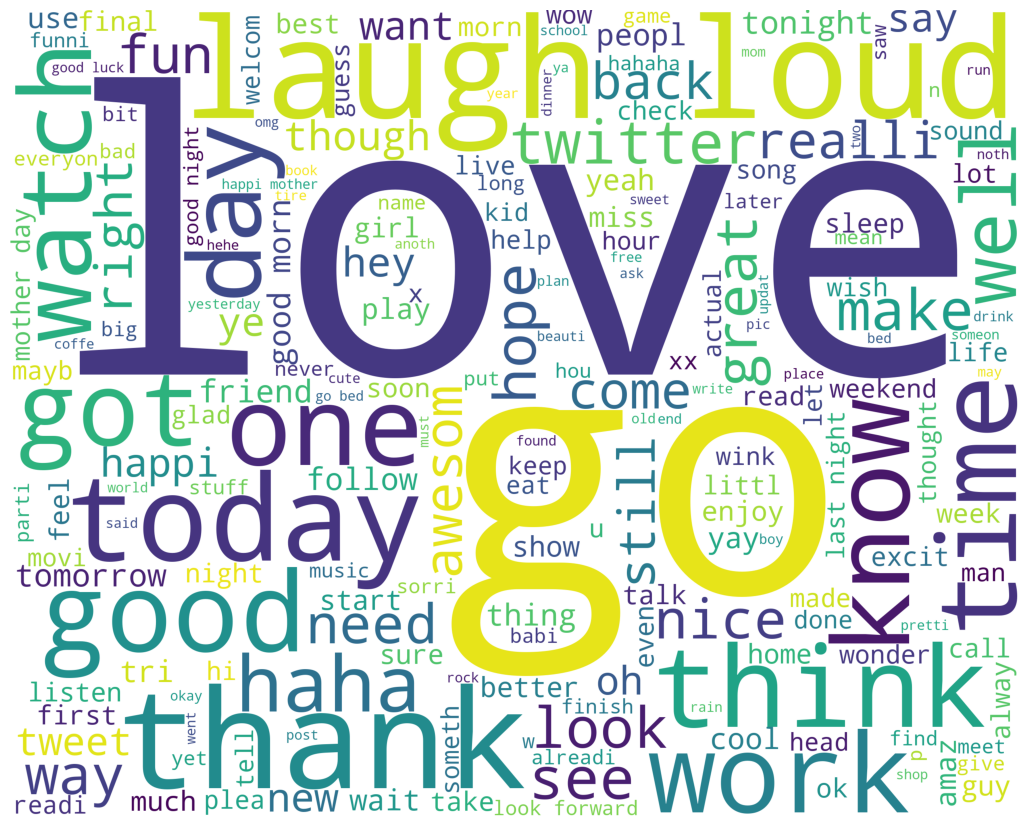

Negative words


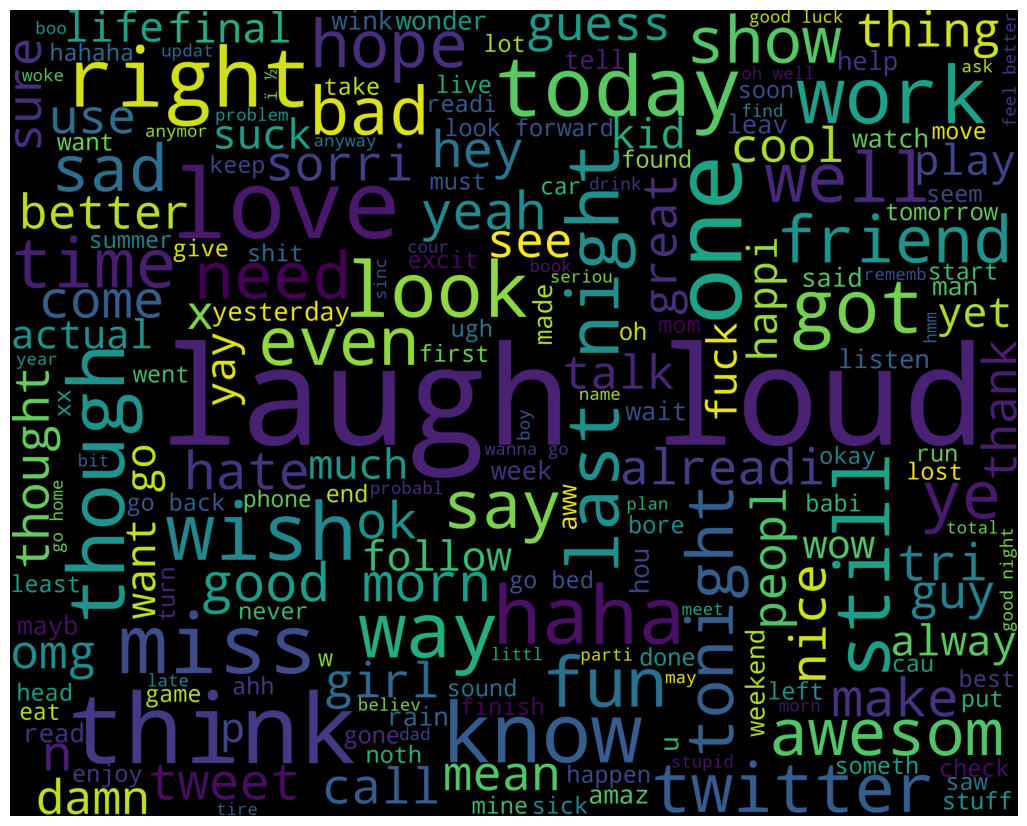

Le temps du CPU : 175.60763120651245


In [48]:
start_time = time()

# Assurez-vous que processedtext est une liste de cha√Ænes de caract√®res
processedtext = [item for sublist in data['text'] for item in sublist]

# S√©parez les donn√©es en mots positifs et n√©gatifs
data_pos = processedtext[:800000]
data_neg = processedtext[800000:]
# D√©finition de la fonction pour dessiner un nuage de mots
def wordcloud_draw(data, color = 'black'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 2500,
                          height = 2000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


print("Positive words")
wordcloud_draw(data_pos, 'white')
print("Negative words")
wordcloud_draw(data_neg)

print('Le temps du CPU :', time() - start_time)


C'est int√©ressant d'observer la (plus grande) occurrence des mots "love"dans les tweets positifs, et de "Work" dans les tweets n√©gatifs. Cependant, et √† mon avis, l'information la plus convaincante observ√©e dans ces images est sans aucun doute l'√©norme occurrence du mot "today" dans les tweets n√©gatifs ( comparant a sa petite occurence  dans les tweets positifs )

On peut interpr√®ter cette information de la mani√®re suivante : Les mauvaises nouvelles se propagent plus vite que les bonnes nouvelles. Les gens ont tendance √† parler et √† partager les mauvaises nouvelles beaucoup plus fr√©quemment et beaucoup plus rapidement que les bonnes nouvelles.

### Construction du vocabulaire 

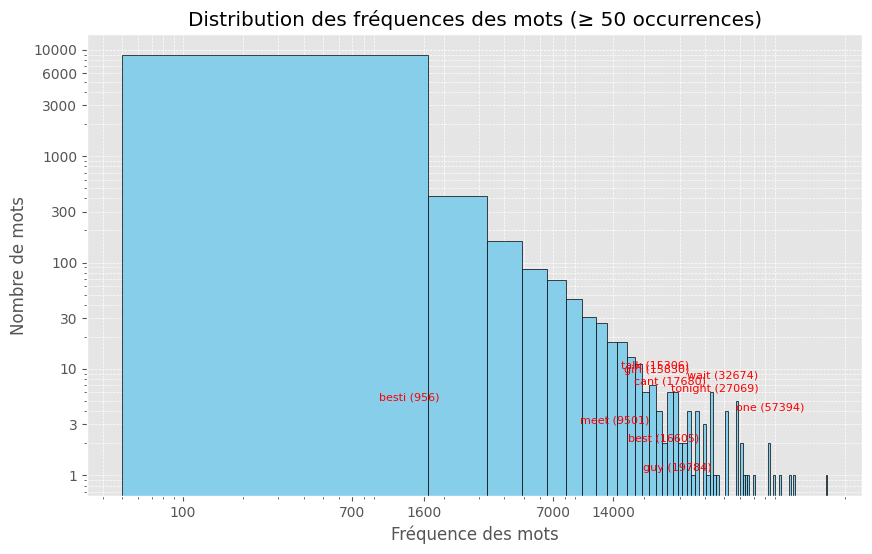

In [49]:
# Compter les occurrences de chaque mot dans le corpus
word_counts = Counter()
for tweet in data['text']:
    word_counts.update(tweet)

# D√©finir un seuil de fr√©quence minimale (par exemple, 10 occurrences)
seuil_min = 50

# Filtrer les mots rares
mots_filtr√©s = [mot for mot, freq in word_counts.items() if freq >= seuil_min]
frequences_filtr√©es = [word_counts[mot] for mot in mots_filtr√©s]

# Cr√©er un histogramme de la distribution des fr√©quences des mots filtr√©s
plt.figure(figsize=(10, 6))
plt.hist(frequences_filtr√©es, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution des fr√©quences des mots (‚â• {} occurrences)'.format(seuil_min))
plt.xlabel('Fr√©quence des mots')
plt.ylabel('Nombre de mots')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# D√©finir les √©tiquettes de l'axe des y de mani√®re personnalis√©e
yticks = [1, 3, 10, 30, 100, 300, 1000, 3000,6000, 10000]  # Valeurs personnalis√©es pour l'axe y
yticklabels = [str(val) for val in yticks]  # Convertir les valeurs en cha√Ænes de caract√®res pour les √©tiquettes
plt.yticks(yticks, yticklabels)  # D√©finir les √©tiquettes personnalis√©es pour l'axe y

# D√©finir les √©tiquettes de l'axe des x de mani√®re personnalis√©e
xticks = [100,700, 1600, 7000, 14000]  # Valeurs personnalis√©es pour l'axe x
xticklabels = [str(val) for val in xticks]  # Convertir les valeurs en cha√Ænes de caract√®res pour les √©tiquettes
plt.xticks(xticks, xticklabels)  # D√©finir les √©tiquettes personnalis√©es pour l'axe x

# Annotations pour les 10 mots les plus fr√©quents
mots_top10 = mots_filtr√©s[:11]
frequences_top10 = frequences_filtr√©es[:11]
for i, (mot, freq) in enumerate(zip(mots_top10, frequences_top10)):
    plt.annotate(f"{mot} ({freq})", xy=(freq, i + 0.1), color='red', fontsize=8)

plt.show()


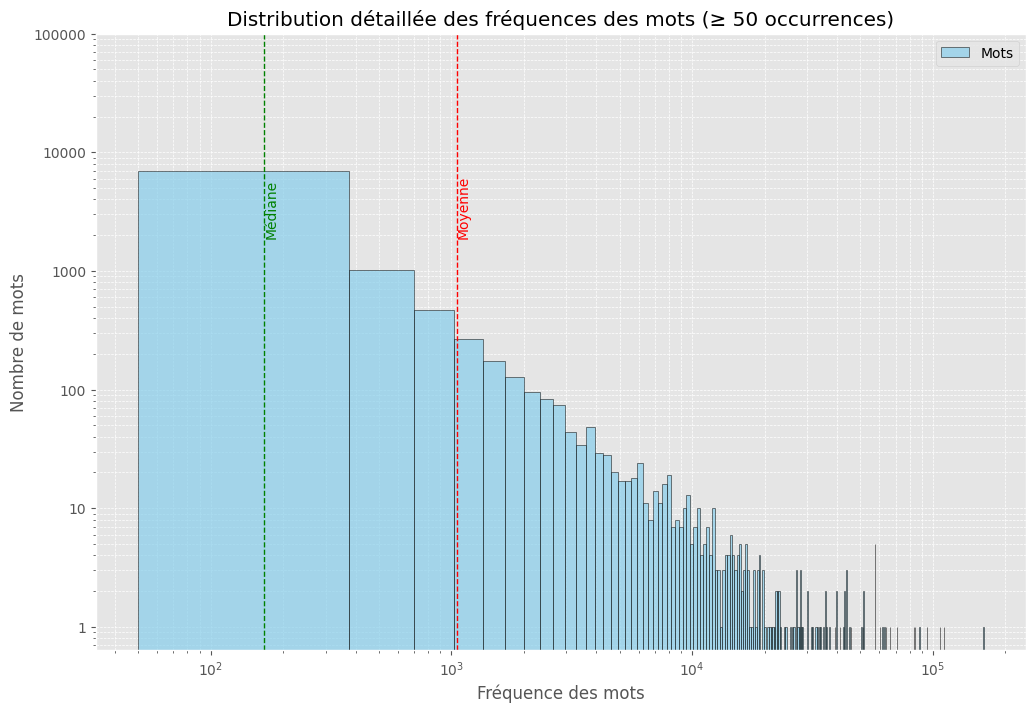

In [50]:
# Cr√©er un histogramme de la distribution des fr√©quences des mots filtr√©s avec plus de bins
plt.figure(figsize=(12, 8))
plt.hist(frequences_filtr√©es, bins=500, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution d√©taill√©e des fr√©quences des mots (‚â• {} occurrences)'.format(seuil_min))
plt.xlabel('Fr√©quence des mots')
plt.ylabel('Nombre de mots')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajouter une l√©gende pour plus de clart√©
plt.legend(['Mots'], loc='upper right')

# Ajouter des annotations pour les statistiques principales
plt.axvline(x=np.mean(frequences_filtr√©es), color='r', linestyle='--', linewidth=1)
plt.text(np.mean(frequences_filtr√©es), 2000, 'Moyenne', rotation=90, color='r')
plt.axvline(x=np.median(frequences_filtr√©es), color='g', linestyle='--', linewidth=1)
plt.text(np.median(frequences_filtr√©es), 2000, 'M√©diane', rotation=90, color='g')

# D√©finir les √©tiquettes de l'axe des y avec des valeurs personnalis√©es pour une meilleure lisibilit√©
yticks = [1, 10, 100, 1000, 10000, 100000]  
yticklabels = [str(val) for val in yticks]  
plt.yticks(yticks, yticklabels)  

plt.show()


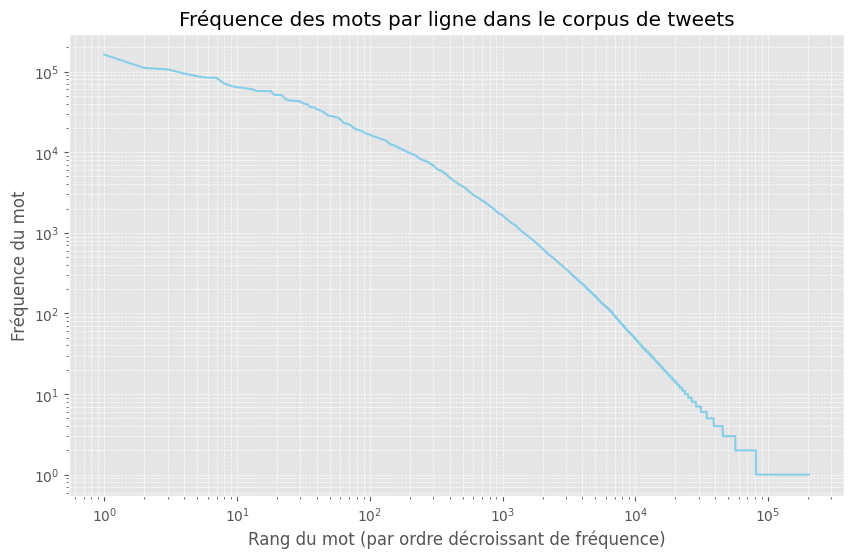

In [51]:
# Compter les occurrences de chaque mot dans le corpus
word_counts = Counter()
for tweet in data['text']:
    word_counts.update(tweet)

# Triez les mots par fr√©quence d'apparition
sorted_word_counts = sorted(word_counts.values(), reverse=True)

# Cr√©er une liste pour les rangs des mots
ranks = list(range(1, len(sorted_word_counts) + 1))

# Visualisation de la fr√©quence des mots par une ligne
plt.figure(figsize=(10, 6))
plt.plot(ranks, sorted_word_counts, color='skyblue')
plt.title('Fr√©quence des mots par ligne dans le corpus de tweets')
plt.xlabel('Rang du mot (par ordre d√©croissant de fr√©quence)')
plt.ylabel('Fr√©quence du mot')
plt.xscale('log')  # Utilisation d'une √©chelle logarithmique pour une meilleure visualisation
plt.yscale('log')  # Utilisation d'une √©chelle logarithmique pour une meilleure visualisation
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Ajout de grilles pour une meilleure lisibilit√©
plt.show()


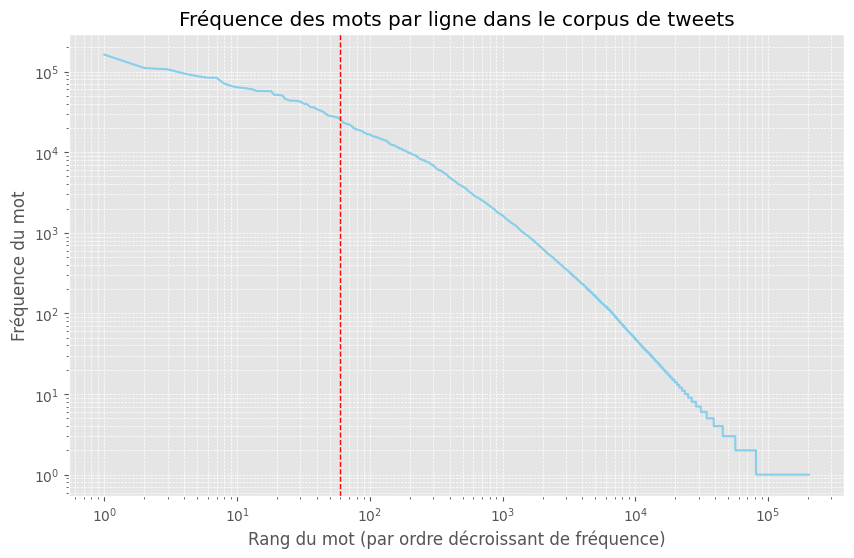

In [52]:
# Compter les occurrences de chaque mot dans le corpus
word_counts = Counter()
for tweet in data['text']:
    word_counts.update(tweet)

# Triez les mots par fr√©quence d'apparition
sorted_word_counts = sorted(word_counts.values(), reverse=True)

# Cr√©er une liste pour les rangs des mots
ranks = list(range(1, len(sorted_word_counts) + 1))

# Convertir les listes en tableaux numpy
ranks_array = np.array(ranks).reshape(-1, 1)
sorted_word_counts_array = np.array(sorted_word_counts)

# Utiliser l'algorithme de d√©tection de ruptures pour identifier les points d'inflexion
model = rpt.Dynp(model="l2", min_size=3).fit(sorted_word_counts_array)
result = model.predict(n_bkps=1)

# Visualisation de la fr√©quence des mots par une ligne
plt.figure(figsize=(10, 6))
plt.plot(ranks, sorted_word_counts, color='skyblue')
plt.title('Fr√©quence des mots par ligne dans le corpus de tweets')
plt.xlabel('Rang du mot (par ordre d√©croissant de fr√©quence)')
plt.ylabel('Fr√©quence du mot')
plt.xscale('log')  # Utilisation d'une √©chelle logarithmique pour une meilleure visualisation
plt.yscale('log')  # Utilisation d'une √©chelle logarithmique pour une meilleure visualisation
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Ajout de grilles pour une meilleure lisibilit√©

# Afficher le point d'inflexion sur le graphique
plt.axvline(x=result[0], color='red', linestyle='--', linewidth=1)

plt.show()


In [53]:
# D√©finir la valeur de K
K = 600 # Vous pouvez ajuster cette valeur empiriquement
#K =500

# Compter le nombre d'occurrences de chaque mot dans nos tweets
word_counts = Counter()

for tweet in data['text']:
    for word in tweet:  # Pas besoin de split(), it√©rer directement sur les listes de mots
        word_counts[word] += 1  

# Filtrer les mots qui apparaissent au moins K fois
filtered_words = {word: count for word, count in word_counts.items() if count >= K}

# Tri des mots en fonction de leur fr√©quence d'apparition "ordre d√©croissant"
#sorted_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)

top_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)

# S√©lectionner les mots les plus fr√©quents
#top_words = sorted_words[:2000]  

# Sauvegarde des mots s√©lectionn√©s dans un fichier vocabulaire
with open('vocab.txt', 'w') as file:
    for word, _ in top_words:
        file.write(word + '\n')

# Nombre de mots dans le vocabulaire
nombre_mots_vocabulaire = len(top_words)
print("Nombre de mots dans le vocabulaire :", nombre_mots_vocabulaire)


Nombre de mots dans le vocabulaire : 2079


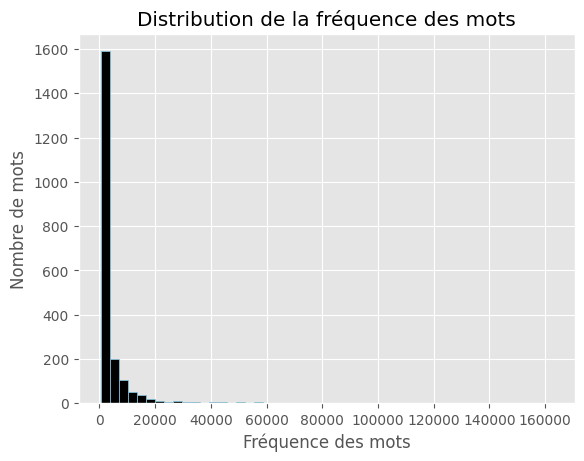

In [54]:
# Obtenir les fr√©quences des mots
frequencies = [count for word, count in filtered_words.items()]

# Tracer l'histogramme
plt.hist(frequencies, bins=50, color='black', edgecolor='skyblue')
plt.xlabel('Fr√©quence des mots')
plt.ylabel('Nombre de mots')
plt.title('Distribution de la fr√©quence des mots')
plt.show()


In [55]:
# Lecture du fichier de vocabulaire
print("Lecture du fichier de vocabulaire...")  
with open('vocab.txt', 'r', encoding='latin-1') as file:
    vocabulaire = file.read().splitlines()

# Creation d'un dictionnaire qui mappe chaque mot a son index dans le vocabulaire
print("Creation du dictionnaire de vocabulaire...")
dictionnaire_vocabulaire = {mot: index for index, mot in enumerate(vocabulaire)}

# Liste pour stocker les index des mots dans chaque tweet
index_tweets = []

# Parcours des tweets 
print("Mapping des mots des tweets vers les index du vocabulaire...")
for i, tweet in enumerate(data['text'], 1):
    index_tweet = []  
    # Parcours de chaque mot dans le tweet
    for mot in tweet:
        # V√©rification si le mot est pr√©sent dans le dictionnaire de vocabulaire
        if mot in dictionnaire_vocabulaire:
            # Ajout de l'index du mot dans la liste d'index du tweet
            index_tweet.append(dictionnaire_vocabulaire[mot])
    # Ajout de la liste d'index du tweet √† la liste d'index des tweets
    index_tweets.append(index_tweet)
    # Affichage de la progression
    if i % 100000 == 0:
        print(f"Tweets trait√©s : {i}/{len(data)}")

print("Termin√©.")


Lecture du fichier de vocabulaire...
Creation du dictionnaire de vocabulaire...
Mapping des mots des tweets vers les index du vocabulaire...
Tweets trait√©s : 100000/1599999
Tweets trait√©s : 200000/1599999
Tweets trait√©s : 300000/1599999
Tweets trait√©s : 400000/1599999
Tweets trait√©s : 500000/1599999
Tweets trait√©s : 600000/1599999
Tweets trait√©s : 700000/1599999
Tweets trait√©s : 800000/1599999
Tweets trait√©s : 900000/1599999
Tweets trait√©s : 1000000/1599999
Tweets trait√©s : 1100000/1599999
Tweets trait√©s : 1200000/1599999
Tweets trait√©s : 1300000/1599999
Tweets trait√©s : 1400000/1599999
Tweets trait√©s : 1500000/1599999
Termin√©.


les tweets sont repr√©sent√©s par des s√©quences d'index, o√π chaque index correspond √† un mot dans le vocabulaire. Ces s√©quences d'index sont ensuite trait√©es avec du padding pour avoir une longueur fixe, mais l'ordre des mots dans chaque s√©quence est pr√©serv√©. Ainsi, m√™me si les mots sont repr√©sent√©s par leurs index et non pas directement par leur pr√©sence ou leur absence, l'ordre des mots est toujours conserv√© dans la repr√©sentation

### Extraction des caracteristiques

In [56]:
#separation des caracteristiques et labels 
X = data.text
y = data.label

In [57]:
# Diviser les donnnees en donnnees d'entrainement et donnees de validation

X_train,X_val,y_train,y_val = train_test_split(data.text, data.label, test_size = 0.2, random_state = 42)

In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1279999,)
(1279999,)
(320000,)
(320000,)


In [59]:
# V√©rifier le type de X_train
print(type(X_train))

# Afficher les cinq premiers √©l√©ments de X_train
print(X_train[:5])


<class 'pandas.core.series.Series'>
641334     [feel, bad, caus, need, work, am, ride, anyon,...
369011                                    [sorri, hear, hon]
680550              [alway, miss, meet, hometown, ugh, luck]
1590713     [true, especi, whole, second, set, stair, clean]
447006     [love, watch, program, horribl, know, pete, ar...
Name: text, dtype: object


#### Methode 1: TF-IDF

In [ ]:
# Joining the elements of the list into a single string
X_train_concatenated = [' '.join(x) for x in X_train]
X_val_concatenated = [' '.join(x) for x in X_val]

# Initialisation du vectoriseur TF-IDF
tfidf = TfidfVectorizer(max_df=0.90, min_df=0.02, max_features=len(dictionnaire_vocabulaire), vocabulary=dictionnaire_vocabulaire)

tfidf.fit(X_train_concatenated)
print(f'Vectoriser fitted.')
num_vocab_words = len(tfidf.vocabulary_)
print('Nombre des mots caracteristiques:', num_vocab_words)
#print('Nombre des mots caracteristiques: ', len(tfidf.get_feature_names()))

X_train_tfidf = tfidf.transform(X_train_concatenated)
X_val_tfidf = tfidf.transform(X_val_concatenated)
print(f'Data Transformed.')


#### Methode 2 :  Le comptage (CountVectorizer)

In [ ]:
# Initialisation du vectoriseur CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.90, min_df=0.02, max_features=len(dictionnaire_vocabulaire), vocabulary=dictionnaire_vocabulaire)

# Adapter le vectoriseur CountVectorizer aux donn√©es d'entra√Ænement
count_vectorizer.fit(X_train_concatenated)
print(f'Vectoriser fitted.')

num_vocab_words = len(count_vectorizer.vocabulary_)
print('Nombre des mots caracteristiques:', num_vocab_words)


# Transformer les donn√©es d'entra√Ænement et de validation en vecteurs d'occurrence des mots
X_train_count = count_vectorizer.transform(X_train_concatenated)
X_val_count = count_vectorizer.transform(X_val_concatenated)
print(f'Data Transformed.')

Vectoriser fitted.
Nombre des mots caracteristiques: 2079
Data Transformed.


<div class="alert alert-block alert-danger">  
<h2><center><strong>Classification</strong></center></h2>   
</div>

### Utilisation des classifieurs ML :

#### La fonction d'evaluation des modeles

In [ ]:
def model_Evaluation(model):
    # Predire les valeurs pour les donnees du test
    y_pred = model.predict(X_val_tfidf)

    # Afficher les metriques d'evaluation pour le dataset
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    # Calculer et afficher la matrice de confusion
    cf_matrix = confusion_matrix(y_val, y_pred)
    categories = ['Negative','Positive']
    group_names = ['Vrai Neg', 'Faux Pos', 'Faux Neg', 'Vrai Pos']
    group_pourcentage = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/ np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_pourcentage)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 18}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()


In [ ]:
def model_Evaluation2(model):

    #Predire les valeurs pour les donnees du test
    y_pred = model.predict(X_val_count)

    #afficher les metriques d'evaluation pour le dataset
    print(classification_report(y_val,y_pred))

    #calculer et afficher la matrice de confusion
    cf_matrix = confusion_matrix(y_val, y_pred)

    categories = ['Negative','Positive']
    group_names = ['Vrai Neg', 'Faux Pos', 'Faux Neg', 'Vrai Pos']
    group_pourcentage = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/ np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_pourcentage)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)

    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size':18}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size':18}, pad=20)
    plt.show()

#### 1- BernoulliNB Model

Meilleurs param√®tres: {'alpha': 1.5}
Accuracy: 0.7521875
              precision    recall  f1-score   support

           0       0.76      0.73      0.75    160506
           1       0.74      0.77      0.76    159494

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



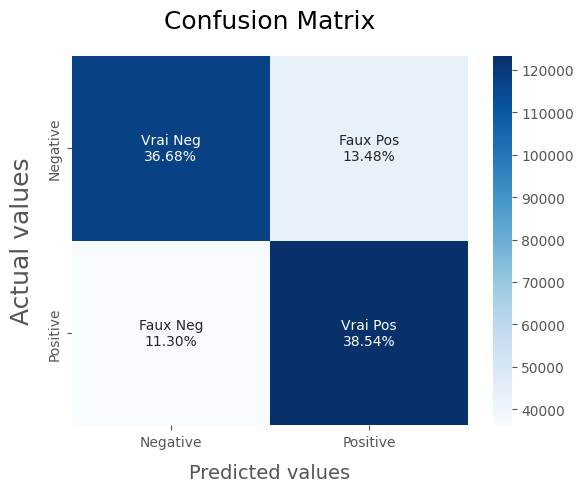

In [ ]:
def model_EvaluationBernoulli(model, X_val, y_val):
    # Predire les valeurs pour les donnees de validation
    y_pred = model.predict(X_val)

    # Calculer et afficher l'accuracy
    accuracy = accuracy_score(y_val, y_pred)
    print("Accuracy:", accuracy)

    # Afficher les metriques d'evaluation pour le dataset
    print(classification_report(y_val, y_pred))

    # Calculer et afficher la matrice de confusion
    cf_matrix = confusion_matrix(y_val, y_pred)

    categories = ['Negative', 'Positive']
    group_names = ['Vrai Neg', 'Faux Pos', 'Faux Neg', 'Vrai Pos']
    group_pourcentage = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_pourcentage)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 18}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()


# D√©finir les valeurs alpha √† rechercher
alphas = [0.1, 0.5, 1.0, 1.5, 2.0]

# D√©finir la grille des param√®tres
param_grid = {'alpha': alphas}

# Initialiser le mod√®le Bernoulli Naive Bayes
BNBmodel = BernoulliNB()

# Cr√©er un objet GridSearchCV
grid_search = GridSearchCV(BNBmodel, param_grid, cv=5, scoring='accuracy')

# Ex√©cuter la recherche sur grille sur les donn√©es d'entra√Ænement
grid_search.fit(X_train_tfidf, y_train)

# Afficher les meilleurs param√®tres trouv√©s
print("Meilleurs param√®tres:", grid_search.best_params_)

# Obtenir le meilleur mod√®le trouv√© par la recherche sur grille
best_BNBmodel = grid_search.best_estimator_

# √âvaluer le meilleur mod√®le
model_EvaluationBernoulli(best_BNBmodel, X_val_tfidf, y_val)


In [ ]:
best_BNBmodel.fit(X_train_count, y_train)
model_Evaluation2(best_BNBmodel)

' best_BNBmodel.fit(X_train_count, y_train)\nmodel_Evaluation2(best_BNBmodel) '

#### 2- MVS (LinearSVC)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75    160506
           1       0.74      0.79      0.76    159494

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



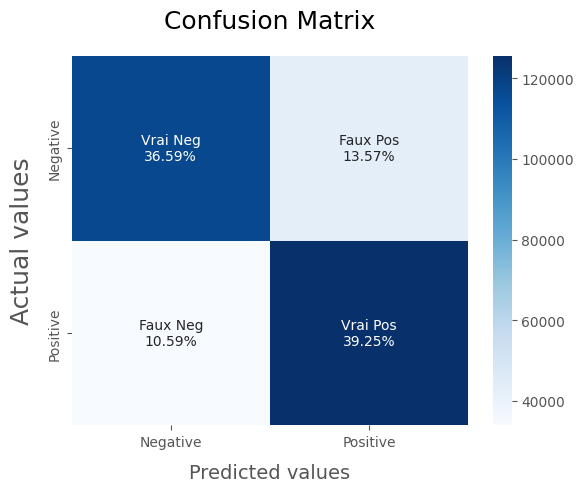

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_tfidf, y_train)
model_Evaluation(SVCmodel)

In [ ]:
SVCmodel.fit(X_train_count, y_train)
model_Evaluation2(SVCmodel)

' SVCmodel.fit(X_train_count, y_train)\nmodel_Evaluation2(SVCmodel) '

#### 3- Regression logistique

In [ ]:
# D√©finir la grille des hyperparam√®tres √† rechercher
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'max_iter': [100, 200, 500, 1000],
              'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}

# Initialiser le mod√®le Logistic Regression
LRmodel = LogisticRegression()

# Cr√©er un objet GridSearchCV
grid_search = GridSearchCV(LRmodel, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ex√©cuter la recherche sur grille sur les donn√©es d'entra√Ænement
grid_search.fit(X_train_tfidf, y_train)

# Afficher les meilleurs param√®tres trouv√©s
print("Meilleurs param√®tres:", grid_search.best_params_)

# Obtenir le meilleur mod√®le trouv√© par la recherche sur grille
best_LRmodel = grid_search.best_estimator_

# √âvaluer le meilleur mod√®le
model_Evaluation(best_LRmodel)

' # D√©finir la grille des hyperparam√®tres √† rechercher\nparam_grid = {\'C\': [0.001, 0.01, 0.1, 1, 10, 100],\n              \'max_iter\': [100, 200, 500, 1000],\n              \'solver\': [\'liblinear\', \'newton-cg\', \'lbfgs\', \'sag\', \'saga\']}\n\n# Initialiser le mod√®le Logistic Regression\nLRmodel = LogisticRegression()\n\n# Cr√©er un objet GridSearchCV\ngrid_search = GridSearchCV(LRmodel, param_grid, cv=5, scoring=\'accuracy\', n_jobs=-1)\n\n# Ex√©cuter la recherche sur grille sur les donn√©es d\'entra√Ænement\ngrid_search.fit(X_train_tfidf, y_train)\n\n# Afficher les meilleurs param√®tres trouv√©s\nprint("Meilleurs param√®tres:", grid_search.best_params_)\n\n# Obtenir le meilleur mod√®le trouv√© par la recherche sur grille\nbest_LRmodel = grid_search.best_estimator_\n\n# √âvaluer le meilleur mod√®le\nmodel_Evaluation(best_LRmodel) '

In [ ]:
best_LRmodel.fit(X_train_count, y_train)
model_Evaluation2(best_LRmodel)

' best_LRmodel.fit(X_train_count, y_train)\nmodel_Evaluation2(best_LRmodel) '

#### 4- KNN

In [ ]:
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(X_train_tfidf, y_train)
model_Evaluation(KNNmodel)

' KNNmodel = KNeighborsClassifier()\nKNNmodel.fit(X_train_tfidf, y_train)\nmodel_Evaluation(KNNmodel) '

In [ ]:
KNNmodel.fit(X_train_count, y_train)
model_Evaluation2(KNNmodel)

' KNNmodel.fit(X_train_count, y_train)\nmodel_Evaluation2(KNNmodel) '

#### 5- Decision Tree

In [ ]:
DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train_tfidf, y_train)
model_Evaluation(DTmodel)

' DTmodel = DecisionTreeClassifier()\nDTmodel.fit(X_train_tfidf, y_train)\nmodel_Evaluation(DTmodel) '

In [ ]:
DTmodel.fit(X_train_count, y_train)
model_Evaluation2(DTmodel)

' DTmodel.fit(X_train_count, y_train)\nmodel_Evaluation2(DTmodel) '

#### 6- Regression lineaire

In [ ]:
def regression_evaluation(model):
    # Faire des pr√©dictions sur les donn√©es de validation
    y_pred = model.predict(X_val_tfidf)

    # Calculer les m√©triques de r√©gression
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)

    # Afficher les m√©triques
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")


# Cr√©er et entra√Æner le mod√®le de r√©gression lin√©aire
RLmodel = LinearRegression()
RLmodel.fit(X_train_tfidf, y_train)

# √âvaluer le mod√®le de r√©gression
regression_evaluation(RLmodel)


In [ ]:
def regression_evaluation2(model):
    # Faire des pr√©dictions sur les donn√©es de validation
    y_pred = model.predict(X_val_count)

    # Calculer les m√©triques de r√©gression
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)

    # Afficher les m√©triques
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")


# Cr√©er et entra√Æner le mod√®le de r√©gression lin√©aire
RLmodel = LinearRegression()
RLmodel.fit(X_train_count, y_train)

# √âvaluer le mod√®le de r√©gression
regression_evaluation(RLmodel)


' \n\ndef regression_evaluation2(model):\n    # Faire des pr√©dictions sur les donn√©es de validation\n    y_pred = model.predict(X_val_count)\n\n    # Calculer les m√©triques de r√©gression\n    mae = mean_absolute_error(y_val, y_pred)\n    mse = mean_squared_error(y_val, y_pred)\n    rmse = np.sqrt(mse)\n\n    # Afficher les m√©triques\n    print(f"Mean Absolute Error: {mae}")\n    print(f"Mean Squared Error: {mse}")\n    print(f"Root Mean Squared Error: {rmse}")\n\n\n# Cr√©er et entra√Æner le mod√®le de r√©gression lin√©aire\nRLmodel = LinearRegression()\nRLmodel.fit(X_train_count, y_train)\n\n# √âvaluer le mod√®le de r√©gression\nregression_evaluation(RLmodel)\n '

#### 7- Naive Bayes

naive bayes tfidf accuracy 0.748546875
              precision    recall  f1-score   support

           0       0.76      0.74      0.75    160506
           1       0.74      0.76      0.75    159494

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



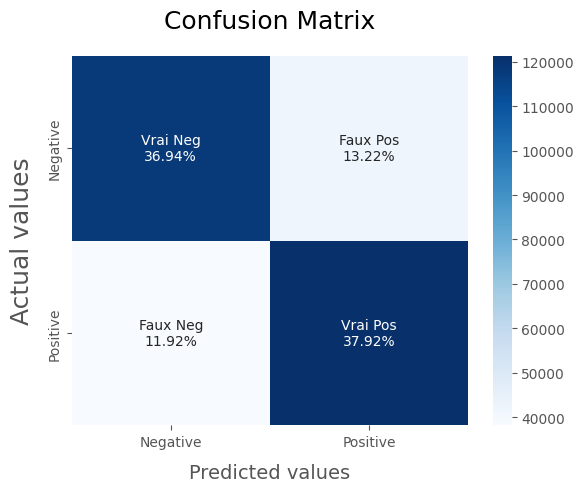

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_val_tfidf)
print('naive bayes tfidf accuracy %s' % accuracy_score(y_pred_nb, y_val))


def model_Evaluation(model, X_val, y_val):
    # Predire les valeurs pour les donnees de validation
    y_pred = model.predict(X_val)

    # Afficher les metriques d'evaluation pour le dataset
    print(classification_report(y_val, y_pred))

    # Calculer et afficher la matrice de confusion
    cf_matrix = confusion_matrix(y_val, y_pred)

    categories = ['Negative', 'Positive']
    group_names = ['Vrai Neg', 'Faux Pos', 'Faux Neg', 'Vrai Pos']
    group_pourcentage = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_pourcentage)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 18}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()

# Utilisation de la fonction pour √©valuer le mod√®le Naive Bayes multinomial
model_Evaluation(nb, X_val_tfidf, y_val)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)
y_pred_nb = nb.predict(X_val_count)
print('naive bayes count accuracy %s' % accuracy_score(y_pred_nb, y_val))


def model_Evaluation(model, X_val, y_val):
    # Predire les valeurs pour les donnees de validation
    y_pred = model.predict(X_val)

    # Afficher les metriques d'evaluation pour le dataset
    print(classification_report(y_val, y_pred))

    # Calculer et afficher la matrice de confusion
    cf_matrix = confusion_matrix(y_val, y_pred)

    categories = ['Negative', 'Positive']
    group_names = ['Vrai Neg', 'Faux Pos', 'Faux Neg', 'Vrai Pos']
    group_pourcentage = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_pourcentage)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 18}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()

# Utilisation de la fonction pour √©valuer le mod√®le Naive Bayes multinomial
model_Evaluation(nb, X_val_count, y_val)

' nb = MultinomialNB()\nnb.fit(X_train_count, y_train)\ny_pred_nb = nb.predict(X_val_count)\nprint(\'naive bayes count accuracy %s\' % accuracy_score(y_pred_nb, y_val))\n\n\ndef model_Evaluation(model, X_val, y_val):\n    # Predire les valeurs pour les donnees de validation\n    y_pred = model.predict(X_val)\n\n    # Afficher les metriques d\'evaluation pour le dataset\n    print(classification_report(y_val, y_pred))\n\n    # Calculer et afficher la matrice de confusion\n    cf_matrix = confusion_matrix(y_val, y_pred)\n\n    categories = [\'Negative\', \'Positive\']\n    group_names = [\'Vrai Neg\', \'Faux Pos\', \'Faux Neg\', \'Vrai Pos\']\n    group_pourcentage = [\'{0:.2%}\'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]\n\n    labels = [f\'{v1}\n{v2}\' for v1, v2 in zip(group_names, group_pourcentage)]\n    labels = np.asarray(labels).reshape(2, 2)\n\n    sns.heatmap(cf_matrix, annot=labels, cmap=\'Blues\', fmt=\'\', xticklabels=categories, yticklabels=categori

<div class="alert alert-block alert-success">  
<h2><center><strong>Reseau neuronal Classique </strong></center></h2>   
</div>


In [ ]:
# Cr√©er une classe personnalis√©e h√©ritant de KerasClassifier
class CustomKerasClassifier(KerasClassifier, BaseEstimator):
    def __init__(self, neurons=64, dropout_rate=0.5, learning_rate=0.001, **kwargs):
        self.neurons = neurons
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        super().__init__(**kwargs)

    # Fonction pour construire le mod√®le
    def _keras_build_fn(self):
        model = Sequential()
        model.add(Dense(self.neurons, input_shape=(X_train_tfidf.shape[1],), activation='relu'))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=Adam(learning_rate=self.learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
        return model

# D√©finir la grille des hyperparam√®tres
param_grid = {
    'neurons': [32, 64, 128],
    'dropout_rate': [0.3, 0.5, 0.7],
    'learning_rate': [0.001, 0.01, 0.1],
}

# Cr√©er une instance de la classe personnalis√©e
model = CustomKerasClassifier()

# Recherche sur grille avec validation crois√©e
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_tfidf, y_train)

# Afficher les meilleurs r√©sultats
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


26667/26667 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85s 3ms/step - accuracy: 0.7430 - loss: 0.5150
13334/13334 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 3ms/step
26667/26667 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 88s 3ms/step - accuracy: 0.7432 - loss: 0.5146
13334/13334 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 2ms/step
26667/26667 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81s 3ms/step - accuracy: 0.7431 - loss: 0.5145
13334/13334 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 3ms/step
26667/26667 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 112s 4ms/step - accuracy: 0.7454 - loss: 0.5114
13334/13334 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 32s 2ms/step
26667/26667 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 130s 5ms/step - accuracy: 0.7456 - loss: 0.5112
13334/13334 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
# Callback personnalis√© pour afficher les informations d'entra√Ænement par batch
class BatchLogger(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        logs = logs or {}
        print(f"After batch {batch}, loss = {logs.get('loss')}, accuracy = {logs.get('accuracy')}")

# Extraire les meilleurs param√®tres
best_params = grid_result.best_params_

# Cr√©er un nouveau mod√®le avec les meilleurs param√®tres
best_model = CustomKerasClassifier(
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'],
    learning_rate=best_params['learning_rate']
)

# Afficher un r√©sum√© du mod√®le
best_model._keras_build_fn().summary()

# Entra√Æner le mod√®le avec l'ensemble de donn√©es d'entra√Ænement complet et afficher l'avancement par batch
batch_logger = BatchLogger()
best_model.fit(X_train_tfidf, y_train, callbacks=[batch_logger], epochs=10, batch_size=32)

# Maintenant, vous pouvez utiliser best_model pour faire des pr√©dictions
predictions = best_model.predict(X_val_tfidf)

# Vous pouvez √©galement √©valuer le mod√®le
accuracy = best_model.score(X_val_tfidf, y_val)
print(f'Accuracy: {accuracy}')

Model: "sequential_168"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_504 (Dense)               ‚îÇ (None, 128)            ‚îÇ       266,240 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_168 (Dropout)           ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_505 (Dense)               ‚îÇ (None, 32)             ‚îÇ         4,128 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_506 (Dense)               ‚îÇ (None, 1)              ‚îÇ            33 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 270,401 (1.03 MB)

 Trainable params: 270,401 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
40000/40000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 318s 8ms/step - accuracy: 0.7501 - loss: 0.5038
Epoch 2/10
40000/40000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 272s 7ms/step - accuracy: 0.7724 - loss: 0.4744
Epoch 3/10
40000/40000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 275s 7ms/step - accuracy: 0.7787 - loss: 0.4663
Epoch 4/10
40000/40000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 279s 7ms/step - accuracy: 0.7832 - loss: 0.4600
Epoch 5/10
40000/40000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 304s 8ms/step - accuracy: 0.7862 - loss: 0.4560
Epoch 6/10
40000/40000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 272s 7ms/step - accuracy: 0.7879 - loss: 0.4534
Epoch 7/10
40000/40000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 259s 6ms/step - accuracy: 0.7906 - loss: 0.4499
Epoch 8/10
40000/40000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

<div class="alert alert-block alert-success">  
<h2><center><strong>LSTM (RNN) üß™</strong></center></h2>   
</div>

<h4> √âtape 1</h4>
- L'entr√©e du mod√®le comprend 500 mots car ce sont les caract√©ristiques/mots que nous avons extraites ci-dessus √† partir du texte des tweets.

<h4> √âtape 2</h4>
- Les embeddings fournissent la pr√©sentation des mots et de leurs significations relatives. Par exemple, ici, nous sp√©cifions le nombre maximal de mots, la longueur des mots d'entr√©e et les entr√©es de la couche pr√©c√©dente.

<h4> √âtape 3</h4>
- LSTM (m√©moire √† court terme √† long terme) sauvegarde les mots et pr√©dit les mots suivants en fonction des mots pr√©c√©dents. LSTM est un pr√©dicteur de s√©quence des mots √† venir.

<img src="https://static.wixstatic.com/media/3eee0b_969c1d3e8d7943f0bd693d6151199f69~mv2.gif">

<h4> √âtape 4</h4>
- La couche Dense r√©duit les sorties en obtenant les entr√©es de la couche Flatten. La couche Dense utilise toutes les entr√©es des neurones de la couche pr√©c√©dente, effectue des calculs et envoie 256 sorties.

<h4> √âtape 5</h4>
- La fonction d'activation est un n≈ìud plac√© √† la fin de toutes les couches du mod√®le de r√©seau neuronal ou entre les couches du r√©seau neuronal. La fonction d'activation aide √† d√©cider quel neurone doit √™tre activ√© et quel neurone doit √™tre d√©sactiv√©. Ainsi, la fonction d'activation du n≈ìud d√©finit la sortie de ce n≈ìud en fonction d'une entr√©e ou d'un ensemble d'entr√©es.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*mcJfRvd9zarAbkHppFRrCQ.gif">

<h4> √âtape 6</h4>
- La couche de Dropout √©limine certains neurones des couches pr√©c√©dentes. Pourquoi appliquons-nous cela ? Nous appliquons cela pour √©viter les probl√®mes de surapprentissage. En surapprentissage, le mod√®le donne une bonne pr√©cision lors de l'apprentissage, mais pas lors du test.
<img src="https://i.imgur.com/a86utxY.gif">

In [ ]:
#l'entrainement du modele est couteux en terme de temps et machine donc pas comme les autres modeles, on prend qu'une part du dataset
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

data_pos = data_pos.iloc[:int(400000)]
data_neg = data_neg.iloc[:int(400000)]

#Maintenant on combine les deux categories des tweets
data = pd.concat([data_pos, data_neg])
print(len(data))
data.head(5)

800000


text  label
799999                          i love u guys r the best       1
800000  im meeting up with one of my besties tonight c...      1
800001   thanks for the twitter add sunisa i got to me...      1
800002  being sick can be really cheap when it hurts t...      1
800003                     he has that effect on everyone      1

In [ ]:
X = data.text
y = data.label

In [ ]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
sequences_matrix.shape

(800000, 500)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.2, random_state=2)

In [ ]:
def tensorflow_based_model(): # D√©finition de la fonction tensorflow_based_model pour l'entra√Ænement du mod√®le bas√© sur TensorFlow
    inputs = Input(name='inputs',shape=[max_len]) # √©tape 1
    layer = Embedding(2000,50,input_length=max_len)(inputs) # √©tape 2
    layer = LSTM(64)(layer) # √©tape 3
    layer = Dense(256,name='FC1')(layer) # √©tape 4
    layer = Activation('relu')(layer) # √©tape 5
    layer = Dropout(0.5)(layer) # √©tape 6
    layer = Dense(1,name='out_layer')(layer) # √©tape 4 √† nouveau, mais cette fois-ci il ne donne qu'une seule sortie car nous devons classer le tweet comme positif ou n√©gatif
    layer = Activation('sigmoid')(layer) # √©tape 5 mais cette fois-ci la fonction d'activation est sigmoid pour une seule sortie.
    model = Model(inputs=inputs,outputs=layer) # ici nous obtenons la valeur de sortie finale dans le mod√®le pour la classification
    return model 

In [ ]:
model = tensorflow_based_model() 
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy']) 

In [ ]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.2)# l'entrainement commencee
print('Entrainement termineee !!')

Epoch 1/6
6400/6400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2653s 414ms/step - accuracy: 0.7294 - loss: 0.5295 - val_accuracy: 0.7651 - val_loss: 0.4843
Epoch 2/6
6400/6400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2728s 426ms/step - accuracy: 0.7648 - loss: 0.4852 - val_accuracy: 0.7675 - val_loss: 0.4794
Epoch 3/6
6400/6400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2682s 419ms/step - accuracy: 0.7697 - loss: 0.4782 - val_accuracy: 0.7690 - val_loss: 0.4799
Epoch 4/6
6400/6400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2612s 408ms/step - accuracy: 0.7724 - loss: 0.4735 - val_accuracy: 0.7695 - val_loss: 0.4762
Epoch 5/6
6400/6400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2658s 415ms/step - accuracy: 0.7767 - loss: 0.4687 - val_accuracy: 0.7711 - val_loss: 0.4749
Epoch 6/6
6400/6400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3928s 614ms/step - accuracy: 0.7771 - loss: 0.468

In [ ]:
accr1 = model.evaluate(X_test,Y_test) #test du modele
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) 

5000/5000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 569s 113ms/step - accuracy: 0.7724 - loss: 0.4764
Test set
  Accuracy: 0.77


In [ ]:
y_pred = model.predict(X_test) #avoir les predictions du modele entrain√©
y_pred = (y_pred > 0.5)

5000/5000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 483s 97ms/step




confusion matrix


[[61489 18765]
 [17683 62063]]




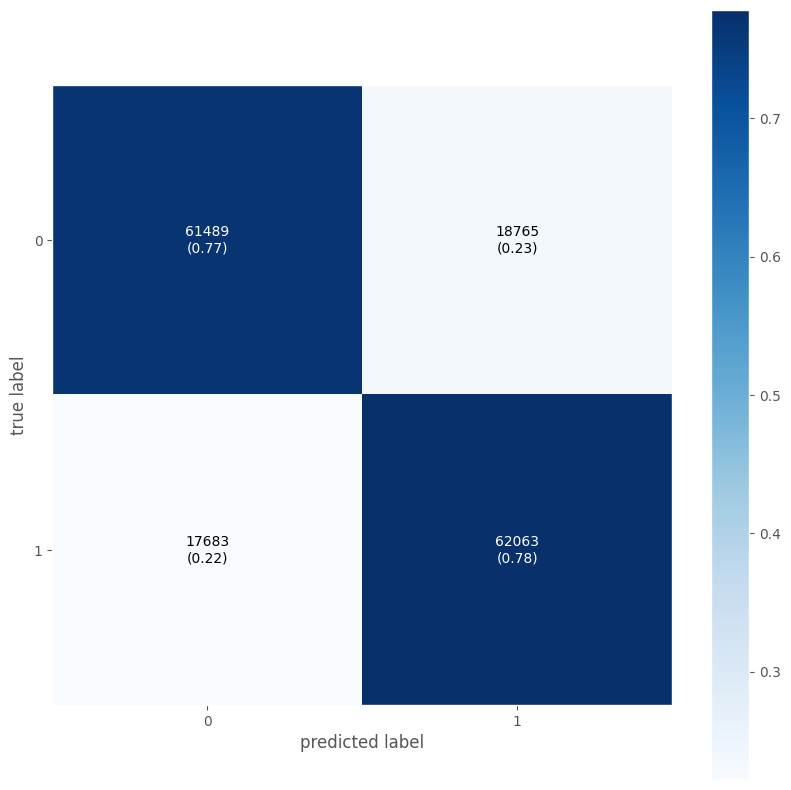

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

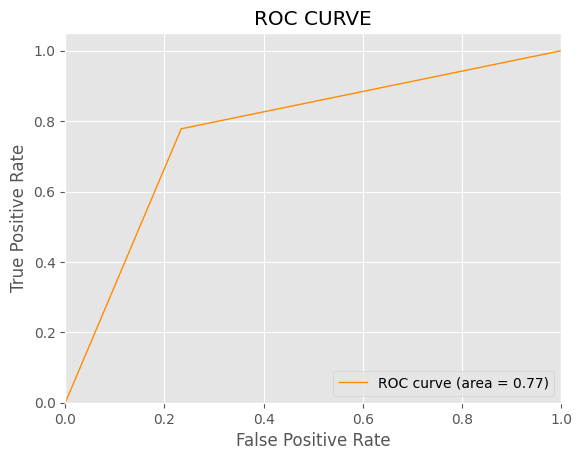

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

<div class="alert alert-block alert-success">  
<h2><center><strong>MERCI POUR LA LECTURE</strong></center></h2>   
</div>